In [2]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code

Download and save the file weight-height.csv into your drive (from https://www.kaggle.com/mustafaali96/weight-height)

With that dataset,  plot histograms, kernel density estimation and Gaussian distribution with MLE for the followings:


*   Height all
*   Height Male
*   Height Female
*   Weight all
*   Weight Male
*   Weight Female

For the histograms, you can use any module. However, you have to implement the code for the kernel density estimation and Gaussian distribution with MLE (you cannot use any specialized library to compute it.) To plot, you can use any library you want.

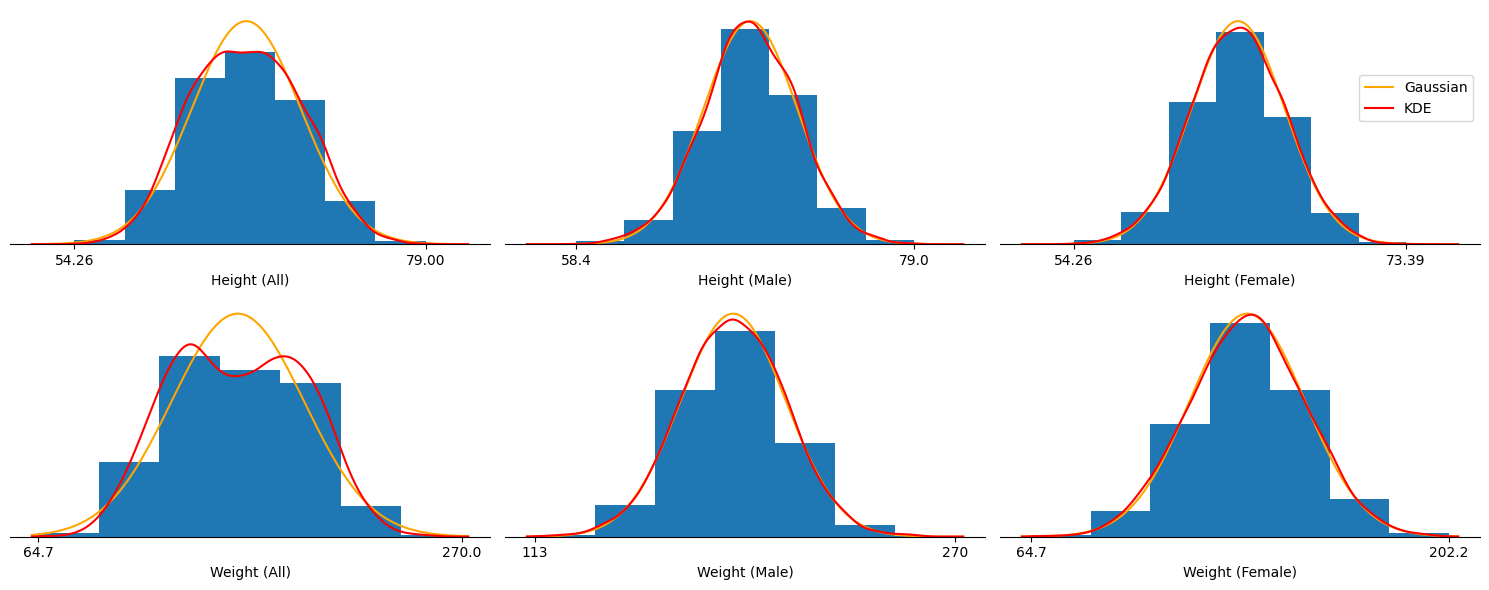

In [93]:
##Code here your own implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the path of csv file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/weight-height.csv'

# Read csv file
data = pd.read_csv(csv_file_path)

# Separate data into male and female
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Function for Guassian Distribution
# https://recipesds.tistory.com/entry/%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88Gaussian-%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%ACNormal-Distribution-%EB%84%88%EB%9E%80-%EB%B6%84%ED%8F%AC-%EC%A0%95%EB%A7%90
def function_gaussian(data, x_data):
  mean = sum(data) / len(data)
  variance = sum((x - mean) ** 2 for x in data) / len(data)
  std_dev = np.sqrt(variance)

  pdf = np.exp(-((x_data - mean) ** 2) / (2 * variance)) / (std_dev * np.sqrt(2 * np.pi))
  return pdf

# Function for KDE
# https://seongkyun.github.io/study/2019/02/03/KDE/
# (2.250)
def function_KDE(data, x_data):
  mean = sum(data) / len(data)
  variance = sum((x - mean) ** 2 for x in data) / len(data)
  std_dev = np.sqrt(variance)

  bandwidth = 1.06 * std_dev * (len(data) ** (-1/5))
  kde = np.zeros_like(x_data, dtype=float)
  for d in data:
    kde += np.exp(-(x_data - d) ** 2 / (2 * bandwidth ** 2)) / (bandwidth * np.sqrt(2 * np.pi))
  return kde / len(data)

# Function for Graph
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
def draw_graph(data, cnt, label):
  plt.subplot(230 + cnt)
  plt.hist(data, bins = 7, density = True)
  plt.xlabel(label)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.gca().axes.get_yaxis().set_visible(False)
  min = data.min()
  max = data.max()
  plt.xticks([min, max])
  x_data = np.linspace(min-3, max+3, len(data)) # ???
  y_data = function_gaussian(data, x_data)
  plt.plot(x_data, y_data, color = 'orange', label = 'Gaussian')
  y_data = function_KDE(data, x_data)
  plt.plot(x_data, y_data, color = 'red', label = 'KDE')

plt.figure(figsize=(15,6))
draw_graph(data['Height'], 1, 'Height (All)')
draw_graph(male_data['Height'], 2, 'Height (Male)')
draw_graph(female_data['Height'], 3, 'Height (Female)')
draw_graph(data['Weight'], 4, 'Weight (All)')
draw_graph(male_data['Weight'], 5, 'Weight (Male)')
draw_graph(female_data['Weight'], 6, 'Weight (Female)')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0, 2.0))
plt.show()

#  ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Let's suppose you are given a csv file that has the Weight and Height of Males and Females. Can you provide a code to load this csv file?
2.   With the loaded file, please plot the histogram for height all (both female and male), height male, height female, weight all, weight female, weight male.
3.   With the same dataset, can you plot kernel density estimation and Gaussian distribution with MLE for these categories: height all (both female and male), height male, height female, weight all, weight female, weight male? Please do not use any specialized library to compute the kernel density estimation and the Gaussian distribution with MLE, do it from scratch.

**Paste the answer provided and run the code below:**

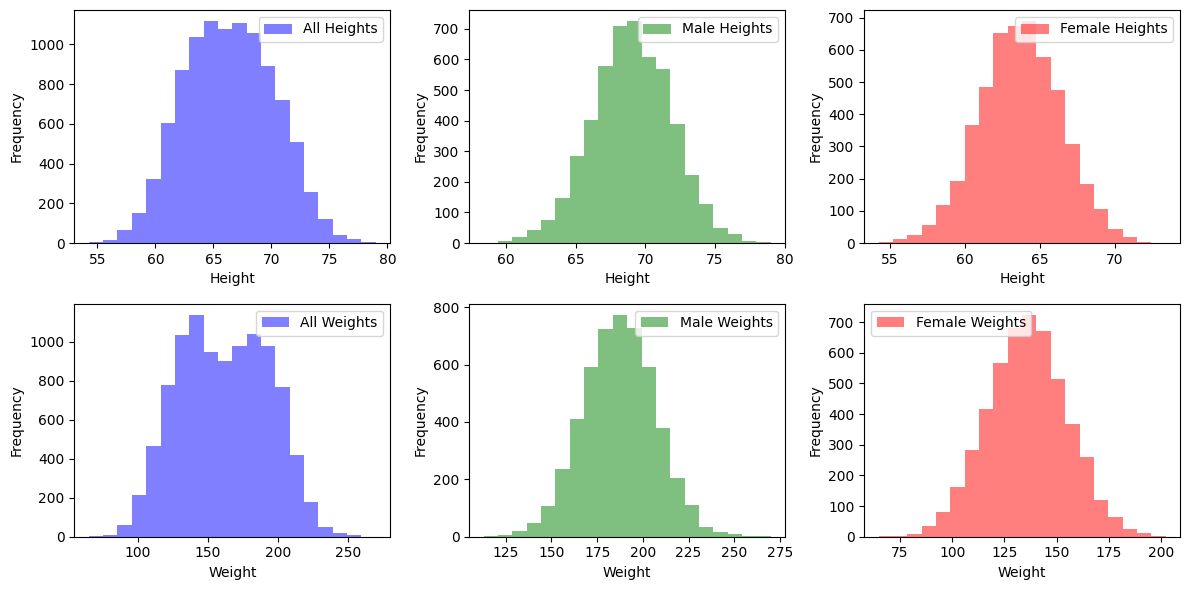

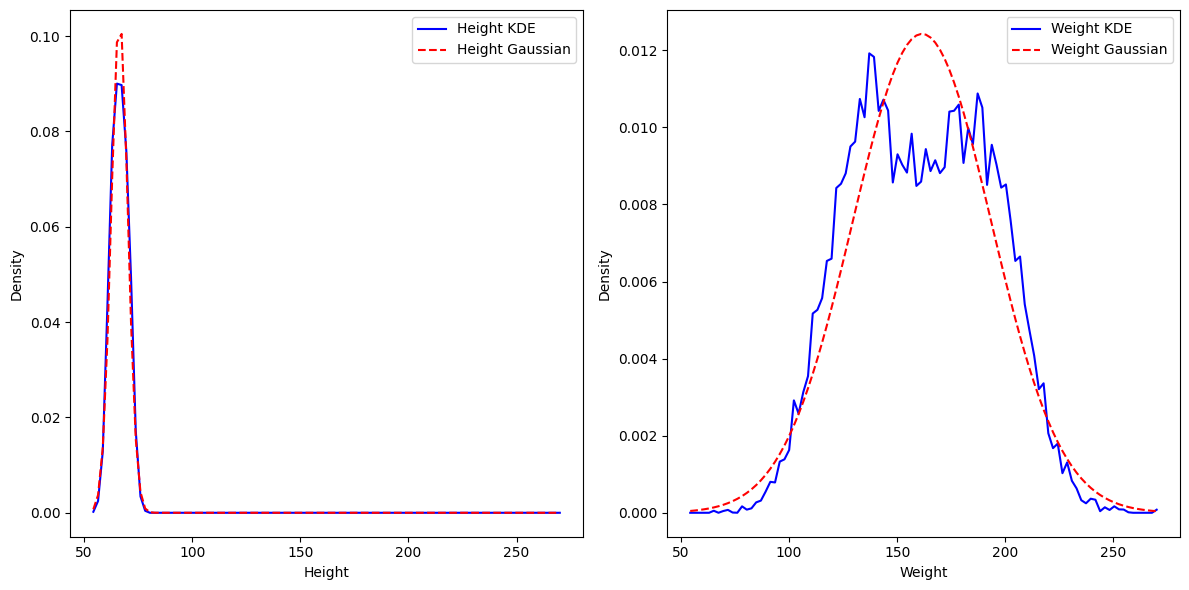

In [77]:
#code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
# data = pd.read_csv("data.csv")

# Extract height and weight data for males and females
height_male = data[data['Gender'] == 'Male']['Height']
height_female = data[data['Gender'] == 'Female']['Height']
weight_male = data[data['Gender'] == 'Male']['Weight']
weight_female = data[data['Gender'] == 'Female']['Weight']
height_all = data['Height']
weight_all = data['Weight']

# Plot histograms for height and weight
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(height_all, bins=20, alpha=0.5, color='blue', label='All Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(height_male, bins=20, alpha=0.5, color='green', label='Male Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(height_female, bins=20, alpha=0.5, color='red', label='Female Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 4)
plt.hist(weight_all, bins=20, alpha=0.5, color='blue', label='All Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(weight_male, bins=20, alpha=0.5, color='green', label='Male Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(weight_female, bins=20, alpha=0.5, color='red', label='Female Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Define a function to compute Gaussian distribution parameters with MLE
def fit_gaussian(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

# Define a function to compute KDE from scratch
def kernel_density_estimation(x, data, bandwidth=0.5):
    kde = []
    for xi in x:
        kernel_sum = 0
        for data_point in data:
            kernel_sum += np.exp(-((xi - data_point) ** 2) / (2 * bandwidth ** 2)) / (bandwidth * np.sqrt(2 * np.pi))
        kde.append(kernel_sum / len(data))
    return kde

# Create a range of values for plotting KDE and Gaussian
x_range = np.linspace(min(height_all.min(), weight_all.min()), max(height_all.max(), weight_all.max()), 100)

# Compute Gaussian parameters with MLE for height and weight
height_mean, height_std_dev = fit_gaussian(height_all)
weight_mean, weight_std_dev = fit_gaussian(weight_all)

# Compute KDE for height and weight
height_kde = kernel_density_estimation(x_range, height_all)
weight_kde = kernel_density_estimation(x_range, weight_all)

# Plot KDE and Gaussian distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_range, height_kde, label='Height KDE', color='blue')
plt.plot(x_range, [1 / (height_std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - height_mean) ** 2 / (2 * height_std_dev ** 2)) for x in x_range], label='Height Gaussian', linestyle='dashed', color='red')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, weight_kde, label='Weight KDE', color='blue')
plt.plot(x_range, [1 / (weight_std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - weight_mean) ** 2 / (2 * weight_std_dev ** 2)) for x in x_range], label='Weight Gaussian', linestyle='dashed', color='red')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()



# Report

1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)

1) Height and weight data for men and women were extracted and stored by declaring variables respectively on the GPT Response. To create the clean code, clearer variable names is more advantages than decresing the line of code.

2) KDE's bandwith was set to a constant value of 0.5 on GPT Response. I used the the following calculation.
$$ h = (\frac{4σ^5}{3n})^\frac{1}{5} ≈ 1.06σn^{-\frac{1}{5}} $$
3) It is the same to draw histogram for each of the six items, but KDE and Gaussian graphs were drawn separately only for the 'Height All' and 'Weight All' items on the GPT Response.

4) x_range was set as min(height_all.min(), weight_all.min()) to max(height_all.max(), weight_all.max()). The height is 54.26 to 79.0, while the weight is 64.7 to 270.0. So simply comparing the maximum and minimum of the two data is problematic. An example of this is the range issue of the height-KDE&Gaussian graph drawn by GPT above. Also, the step is to large as 100 even the real data is 10,000 steps.

---

2.   Ask ChatGPT which parameters are the best for the histogram plot. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response : <br>
The choice of parameters for a histogram plot can affect its appearance and how well it represents the underlying data. Some of the key parameters to consider for creating effective histograms include:
1. **Number of Bins (`bins`):** This parameter determines the number of intervals or bins into which the data range is divided. Choosing an appropriate number of bins is essential. Too few bins can oversimplify the data distribution, while too many bins can result in a noisy or cluttered plot. A common rule of thumb is to use the square root of the number of data points, but you may need to experiment to find the best value for your specific dataset.
2. **Color and Transparency (`color`, `alpha`):** You can choose the color of the bars in the histogram using the `color` parameter. Using different colors for different categories or data subsets can help distinguish them. The `alpha` parameter controls the transparency of the bars, which can be useful when you have overlapping histograms.
3. **Labeling and Legends (`label`):** Adding labels to your histograms and providing a legend is crucial, especially when you have multiple histograms in a single plot. Labels and legends make it clear which data each histogram represents.
4. **Range (`range` or `range` argument in `numpy.histogram`):** You can specify the range of values to include in the histogram. This can be useful if you want to focus on a specific portion of your data range. If not specified, the range will be determined automatically from your data.
5. **Normalization (`density`):** Setting the `density` parameter to `True` normalizes the histogram, meaning that the sum of the bar heights will equal 1, representing probabilities rather than raw frequencies. This can be useful when comparing distributions with different sample sizes.
6. **Axis Labels and Titles (`xlabel`, `ylabel`, `title`):** Providing clear axis labels and a title for your histogram helps convey the information it represents. Make sure to label the x-axis and y-axis appropriately based on your data.
7. **Gridlines (`grid`):** Adding gridlines can make it easier to read the values from the histogram.
8. **Histogram Type (`histtype`):** You can choose from different histogram types, such as 'bar', 'step', 'stepfilled', etc. The choice depends on your preference and the style of representation you want.<br><br>
The "best" parameters for your histogram plot depend on your specific data and the message you want to convey. Experimenting with different settings and visual styles is often necessary to find the most suitable representation for your dataset.

Among the 8 parameters, the one that presents an appropriate value is density='True'. This parameter is appropriate. Unlike density='False', which counts the absolute number of items, 'True' measures relative density. If operated with the 'False' or default option, the KDE and Gaussian graphs will not be noticeable due to the two values being too small compared to the histogram.

---

3.   Ask ChatGPT which parameters are the best for the KDE and Gaussian plot. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response : <br>
The choice of parameters for KDE (Kernel Density Estimation) and Gaussian plot (with MLE) depends on the characteristics of your data and the level of detail you want to convey in your visualizations. Here are the key parameters to consider when creating effective KDE and Gaussian plots:
1. **Bandwidth (`bandwidth`):** The bandwidth parameter controls the width of the kernel used in KDE. It determines the smoothness of the estimated density. A smaller bandwidth results in a more sensitive but noisier estimate, while a larger bandwidth produces a smoother but less sensitive estimate. You may need to experiment with different bandwidth values to find the best one for your data.
2. **Range (`x_range`):** The range of values over which you compute the KDE and Gaussian distributions should cover the entire range of your data. You can define the `x_range` as a set of evenly spaced points within the data range.
3. **Normalization:** Similar to histograms, you can choose whether to normalize the KDE and Gaussian plots. Normalization makes the area under the curve equal to 1, representing probabilities. This can be controlled by ensuring that the area under the curve integrates to 1.
4. **Color and Line Style:** You can use different colors and line styles to distinguish between KDE and Gaussian curves if you are plotting both on the same graph. Clear visual cues help differentiate between the two.
5. **Labeling and Legends (`label`):** Adding labels and legends to your plots is essential, especially when you have multiple curves on the same graph. Labels help identify which curve represents which data.
6. **Kernel Type and Kernel Function:** You can choose different kernel functions (e.g., Gaussian, Epanechnikov, etc.) for KDE, depending on the shape of your data distribution. The choice of kernel can impact the appearance of the KDE plot.
7. **Number of Points in `x_range`:** The number of points in your `x_range` can affect the smoothness of the KDE curve. More points result in a smoother curve but may require more computational resources.
8. **Gaussian Distribution Parameters (`mean`, `std_dev`):** For the Gaussian plot with MLE, you'll need to estimate the mean and standard deviation from your data. These parameters define the center and spread of the Gaussian distribution.
9. **Plot Axis Labels and Titles (`xlabel`, `ylabel`, `title`):** Clearly label your axes and provide a title to convey the information represented in your plot.<br><br>
Here's a general template for plotting KDE and Gaussian distributions with the mentioned parameters:
```python
import numpy as np
import matplotlib.pyplot as plt and
data = ...      # Define your data
bandwidth = ...        # Define your bandwidth
x_range = np.linspace(min(data), max(data), 100)    # Create a range of values for x-axis
kde = kernel_density_estimation(x_range, data, bandwidth)      # Compute KDE
mean, std_dev = fit_gaussian(data)      # Compute Gaussian distribution parameters
gaussian = [1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2)) for x in x_range]       # Compute Gaussian curve
plt.plot(x_range, kde, label='KDE', color='blue')     # Plot KDE
plt.plot(x_range, gaussian, label='Gaussian', linestyle='dashed', color='red')  # Plot Gaussian
plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.title('KDE vs. Gaussian')
plt.legend()
plt.grid(True)
plt.show()    # Show the plot
```
The best parameters for your KDE and Gaussian plot depend on your specific data distribution and the purpose of your visualization. Experiment with different parameter values to achieve the desired level of detail and representation of your data.

No specific parameter was suggetsed from GPT but one import parameter is exist. The bandwidth. From the technical blog, https://seongkyun.github.io/study/2019/02/03/KDE/, suggested the formula, said above first report question.
$$ h = (\frac{4σ^5}{3n})^\frac{1}{5} ≈ 1.06σn^{-\frac{1}{5}} $$
But GPT doesn't said about this and just let the value as 0.5

---

4.   Conclude with some thoughts and things you learned from this homework.

Among the homework, I know the variant kernel functions for KDE. I also know how to implement those fomula as a code. This is good experiment not to use mathmethical libraries. I know some technique to use Python array.
